In [53]:
import pandas as pd
import empath
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [54]:
subreddit_control = 'politics'

conspiracy_file = open("./data/conspiracy_submissions_wordlist.txt", "r")
conspiracy_words = conspiracy_file.read().split("\n")

control_file = open(f"./data/{subreddit_control}_submissions_wordlist.txt", "r")
control_words = control_file.read().split("\n")

In [55]:
def plotHotTopics(words, subreddit):
    lexicon = empath.Empath()
    empath_results = lexicon.analyze(words, normalize=True)
    empath_results_sorted = sorted(empath_results.items(), key=lambda x: x[1], reverse=True)

    plt.figure(figsize = (14, 14))

    top_ten = dict(list(empath_results_sorted)[:10])
    labels = list(top_ten.keys())
    values = list(top_ten.values())
    ax = sns.barplot(x=labels, y=values)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.title(f"Most prevalent lexical categories in r/{subreddit}")
    plt.xlabel("top categories")
    plt.ylabel("proportion") #better label
    plt.savefig(f"./images/empath/{subreddit}_empath.png")
    return empath_results


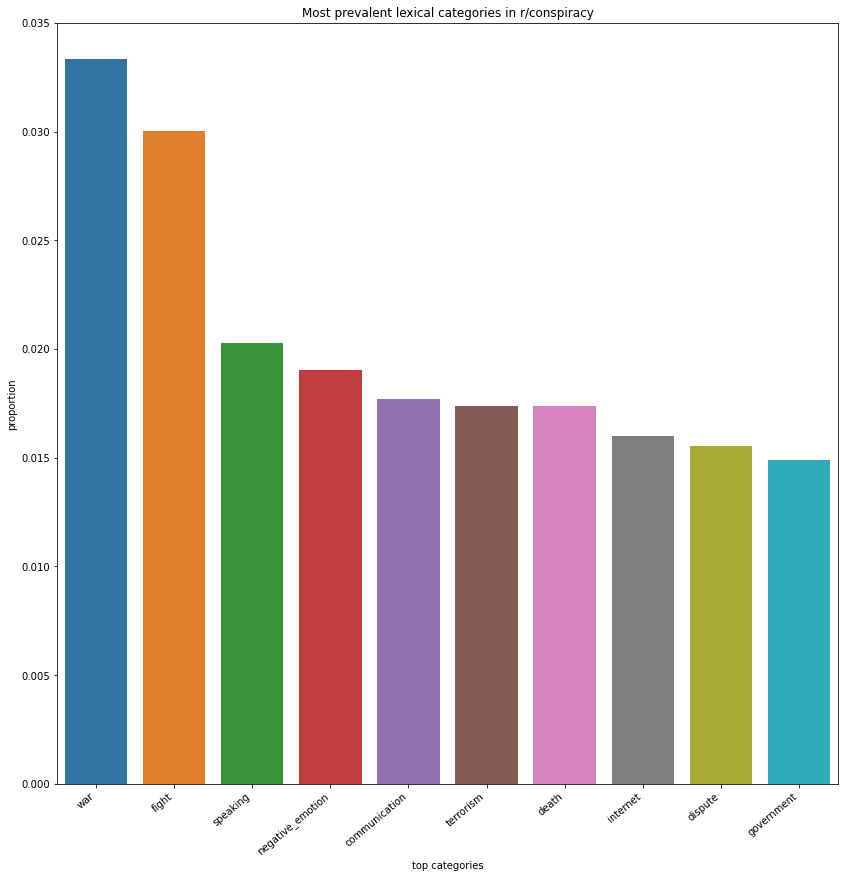

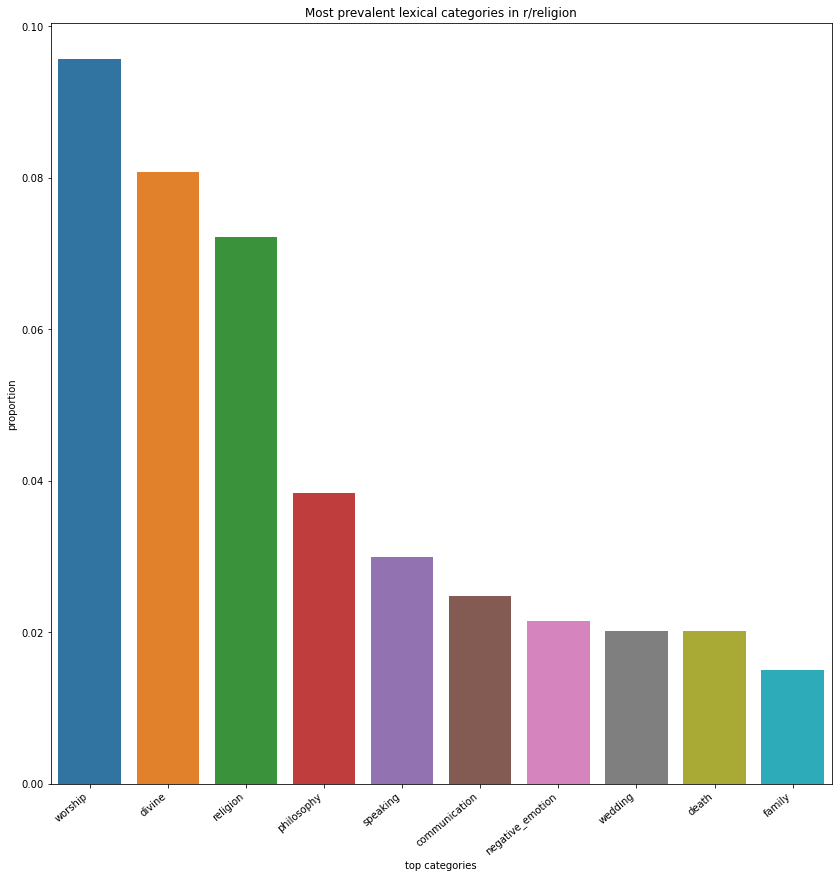

In [56]:
conspiracy_empath = plotHotTopics(conspiracy_words, 'conspiracy')
control_empath = plotHotTopics(control_words, subreddit_control)

0.08924722891393526
[('worship', -1.036041892691981), ('divine', -0.8420050484135924), ('religion', -0.780764985685492), ('philosophy', -0.36571867126167157), ('wedding', -0.16397374643228332), ('family', -0.12106007696020873), ('children', -0.10966952333118063), ('speaking', -0.10852247406808799), ('government', 0.1013438008692851), ('technology', 0.1062660826182699), ('military', 0.11626373684629066), ('social_media', 0.12059401749630914), ('internet', 0.1572754613863996), ('terrorism', 0.18040121132245274), ('fight', 0.22708181772361866), ('war', 0.2860338150577524)]


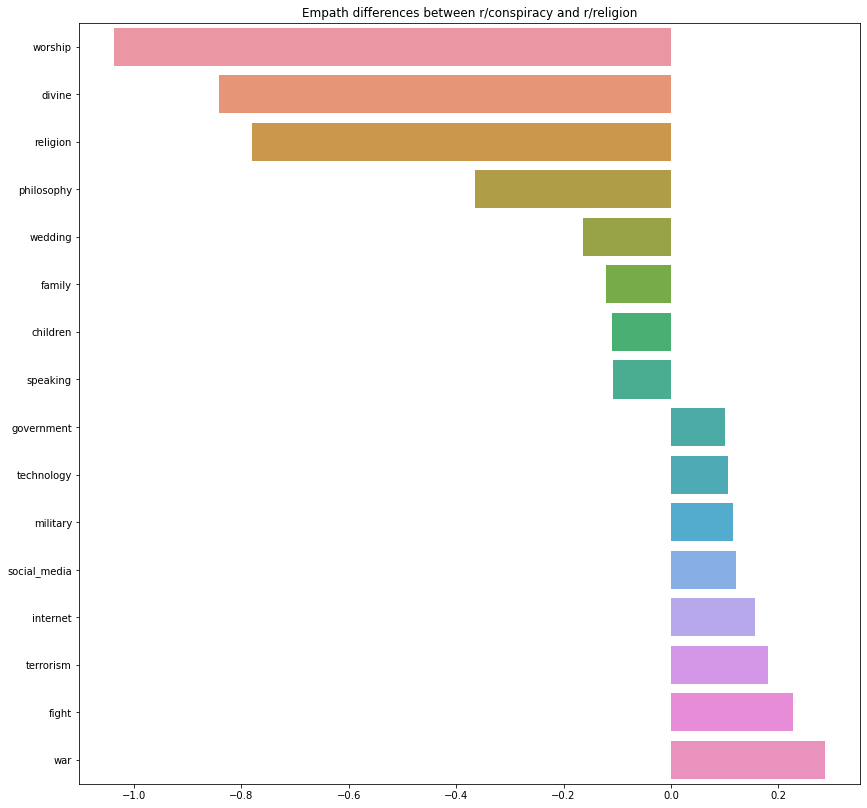

In [57]:
pooled_standard_dev = np.sqrt((np.std(list(conspiracy_empath.values())) + np.std(list(control_empath.values()))) / 2)
print(pooled_standard_dev)


differences = {}
assorted_diffs = {}
for key in conspiracy_empath:
    differences[key] = (conspiracy_empath[key] - control_empath[key]) / pooled_standard_dev

for (key, value) in differences.items():
   if abs(value) >= 0.1:
       assorted_diffs[key] = value

differences_sorted = sorted(assorted_diffs.items(), key=lambda x: x[1])
print(differences_sorted)

figure = plt.figure(figsize = (14, 14))

#top_ten = dict(list(differences_sorted)[:5] + list(differences_sorted[-5:]))
top_ten = dict(list(differences_sorted))
labels = list(top_ten.keys())
values = list(top_ten.values())
ax = sns.barplot(x=values, y=labels)
plt.title(f"Empath differences between r/conspiracy and r/{subreddit_control}")
plt.savefig(f"./images/empath/empath_differences_conspiracy_{subreddit_control}.png")
